In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sales = pd.read_csv("C:/Users/anant/OneDrive/Documents/The Developers Arena/Week5-Customer-Sales-Analysis/sales_data.csv")
customers = pd.read_csv("C:/Users/anant/OneDrive/Documents/The Developers Arena/Week5-Customer-Sales-Analysis/customer_churn.csv")


KeyError: 'Customer_ID'

In [ ]:
print(sales.columns)

Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales'],
      dtype='object')


In [ ]:
sales.fillna(0, inplace=True)
customers.drop_duplicates(inplace=True)


In [ ]:
df = pd.merge(sales, customers, on="Customer_ID", how="left")


In [ ]:
total_revenue = df['Total_Sales'].sum()


In [ ]:
customer_value = df.groupby('Customer_Name')['Total_Sales'].sum().sort_values(ascending=False)


In [ ]:
df['Month'] = df['Order_Date'].dt.month
monthly_sales = df.groupby('Month')['Total_Sales'].sum()


In [ ]:
pivot_table = pd.pivot_table(
    df,
    values='Total_Sales',
    index='Region',
    columns='Product',
    aggfunc='sum',
    fill_value=0
)
pivot_table


In [ ]:
customer_value.head(5).plot(kind='bar', title='Top 5 Customers')
plt.show()


In [ ]:
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.show()


In [ ]:
sns.barplot(x=df['Region'], y=df['Total_Sales'])
plt.title("Sales by Region")
plt.show()


First 5 rows of data:
         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
0  2024-01-01       Phone         7  37300     CUST001   East       261100
1  2024-01-02  Headphones         4  15406     CUST002  North        61624
2  2024-01-03       Phone         2  21746     CUST003   West        43492
3  2024-01-04  Headphones         1  30895     CUST004   East        30895
4  2024-01-05      Laptop         8  39835     CUST005  North       318680

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage:

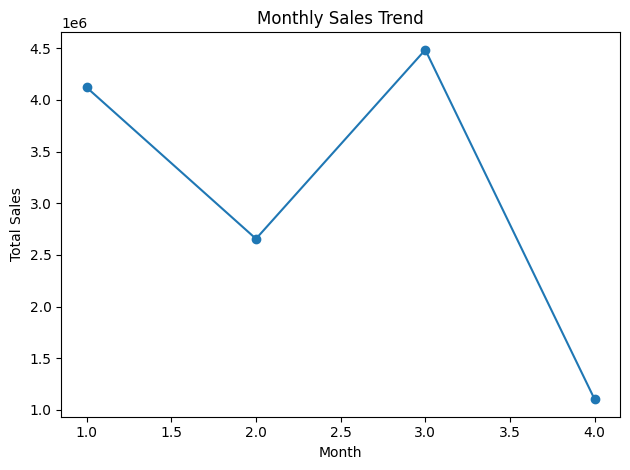

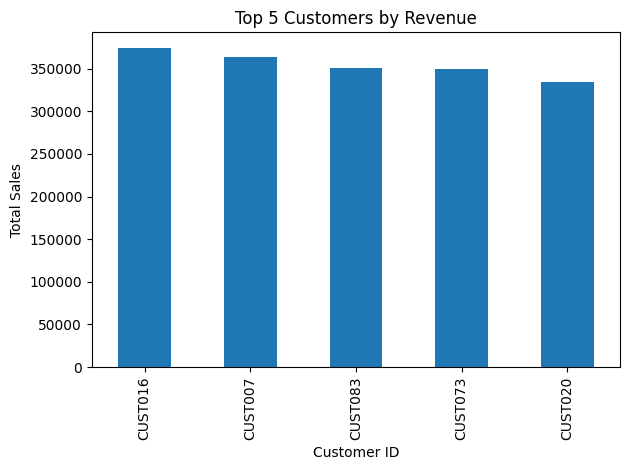


📊 CUSTOMER SALES ANALYSIS REPORT
--------------------------------
Total Revenue: ₹12,365,048.00
Total Customers: 100
Average Order Value: ₹123,650.48

Top 5 Customers:
Customer_ID
CUST016    373932
CUST007    363870
CUST083    350888
CUST073    349510
CUST020    333992
Name: Total_Sales, dtype: int64

High-Value Sales in North Region:
         Date     Product  Quantity  Price Customer_ID Region  Total_Sales  \
1  2024-01-02  Headphones         4  15406     CUST002  North        61624   
4  2024-01-05      Laptop         8  39835     CUST005  North       318680   
8  2024-01-09      Tablet         3  32791     CUST009  North        98373   
17 2024-01-18      Tablet         4  19322     CUST018  North        77288   
19 2024-01-20      Laptop         8  41749     CUST020  North       333992   

    Year  Month  Day  
1   2024      1    2  
4   2024      1    5  
8   2024      1    9  
17  2024      1   18  
19  2024      1   20  

Pivot Table (Region vs Product):
Product  Headphones  

In [7]:
# Week 5: Advanced Data Manipulation with Pandas
# Customer Sales Analysis

import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. LOAD DATA
# -----------------------------

# Load sales data
df = pd.read_csv(
    "C:/Users/anant/OneDrive/Documents/The Developers Arena/Week5-Customer-Sales-Analysis/sales_data.csv"
)

# Preview data
print("First 5 rows of data:")
print(df.head())

# -----------------------------
# 2. DATA EXPLORATION
# -----------------------------

print("\nDataset Info:")
print(df.info())

print("\nColumn Names:")
print(df.columns.tolist())

# -----------------------------
# 3. DATA CLEANING
# -----------------------------

# Handle missing values
df.fillna(0, inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# -----------------------------
# 4. FEATURE ENGINEERING
# -----------------------------

# Extract date parts
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# -----------------------------
# 5. AGGREGATIONS & ANALYSIS
# -----------------------------

# 1. Total Revenue
total_revenue = df['Total_Sales'].sum()

# 2. Total Customers
total_customers = df['Customer_ID'].nunique()

# 3. Average Order Value
average_order_value = df['Total_Sales'].mean()

# 4. Top Customers by Revenue
top_customers = (
    df.groupby('Customer_ID')['Total_Sales']
    .sum()
    .sort_values(ascending=False)
)

# 5. Monthly Sales
monthly_sales = df.groupby('Month')['Total_Sales'].sum()

# -----------------------------
# 6. FILTERING (MULTIPLE CONDITIONS)
# -----------------------------

high_value_north_sales = df[
    (df['Total_Sales'] > 20000) &
    (df['Region'] == 'North')
]

# -----------------------------
# 7. PIVOT TABLE (MANDATORY)
# -----------------------------

pivot_table = pd.pivot_table(
    df,
    values='Total_Sales',
    index='Region',
    columns='Product',
    aggfunc='sum',
    fill_value=0
)

# -----------------------------
# 8. VISUALIZATIONS
# -----------------------------

# Monthly Sales Trend
plt.figure()
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Top 5 Customers
plt.figure()
top_customers.head(5).plot(kind='bar')
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# -----------------------------
# 9. FINAL REPORT OUTPUT
# -----------------------------

print("\n📊 CUSTOMER SALES ANALYSIS REPORT")
print("--------------------------------")
print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Total Customers: {total_customers}")
print(f"Average Order Value: ₹{average_order_value:,.2f}")

print("\nTop 5 Customers:")
print(top_customers.head())

print("\nHigh-Value Sales in North Region:")
print(high_value_north_sales.head())

print("\nPivot Table (Region vs Product):")
print(pivot_table)
